In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from typing import Dict, List

In [13]:
class MarketDataParser:
    def __init__(self, file_path: str):
        """ Initialise the DataParser class
        
        Args:
            data_location (DataLocation): Data location object, with data path and event list
        """
        self.file = file_path

    def parse_file2(self, file_path: str) -> Dict[str, Dict]:
        """ Parse a file into a dictionary

        Args:
            file_path (str): File path to parse

        Returns:
            Dict[str, List]: Dictionary of parsed file
        """
        with open(file_path, "r") as file:
            market_data = {}
            for line in file:
                market_data.update(json.loads(line))

        res = {"mcm": market_data}
        return res
    
    def parse_file(self, file_path: str) -> Dict[str, Dict]:
        """ Parse a file into a dictionary

        Args:
            file_path (str): File path to parse

        Returns:
            Dict[str, List]: Dictionary of parsed file
        """
        with open(file_path, "r") as file:
            market_data = []
            for line in file:
                market_data.append(json.loads(line))

        #res = {"mcm": market_data}
        return market_data
    
    def _replace_extension(self, file_path: str, new_extension) -> str:
        """ Replace the extension of a file path

        Args:
            file_path (str): File path
            new_extension (str): New extension (json, txt, etc)

        Returns:
            str: File path with new extension
        """
        file_path_without_extension = file_path.rsplit('.', 1)[0]
        new_file_path = file_path_without_extension + '.' + new_extension

        return new_file_path


In [14]:
file_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO/2023/Jan/1/31993143"
file_name = "1.208134610"
file_path = os.path.join(file_dir, file_name)

parser = MarketDataParser(file_path=file_path)

In [15]:
data = parser.parse_file(file_path=file_path)
data

[{'op': 'mcm',
  'clk': '7379890424',
  'pt': 1672445977434,
  'mc': [{'id': '1.208134610',
    'marketDefinition': {'bspMarket': False,
     'turnInPlayEnabled': True,
     'persistenceEnabled': True,
     'marketBaseRate': 5.0,
     'eventId': '31993143',
     'eventTypeId': '2',
     'numberOfWinners': 1,
     'bettingType': 'ODDS',
     'marketType': 'MATCH_ODDS',
     'marketTime': '2022-12-31T23:00:00.000Z',
     'suspendTime': '2022-12-31T23:00:00.000Z',
     'bspReconciled': False,
     'complete': True,
     'inPlay': False,
     'crossMatching': True,
     'runnersVoidable': False,
     'numberOfActiveRunners': 2,
     'betDelay': 0,
     'status': 'OPEN',
     'runners': [{'status': 'ACTIVE',
       'sortPriority': 1,
       'id': 4829328,
       'name': 'Laura Siegemund'},
      {'status': 'ACTIVE',
       'sortPriority': 2,
       'id': 2497008,
       'name': 'Petra Kvitova'}],
     'regulators': ['MR_INT'],
     'countryCode': 'GB',
     'discountAllowed': False,
     't

In [24]:
def parse_historical_data2(file_path: str) -> dict:
    markets = {}

    with open(file_path, "r") as file:
        data = json.load(file)
        print("Dataset Size: ", len(data))

    for packet in data:
        time = packet["pt"]
        operation = packet["op"]

        if operation == "mcm":
            for market in packet["mc"]:
                if market["id"] not in markets:
                    markets.update({
                        market["id"]: {
                            time: market
                        }
                    })
                else:
                    markets[market["id"]].update({
                        time: market
                    })    
    return markets


def parse_historical_data(data: List) -> dict:
    markets = {}

   # with open(file_path, "r") as file:
    #    data = json.load(file)
     #   print("Dataset Size: ", len(data))

    for packet in data:
        #print(type(packet))
        time = packet["pt"]
        operation = packet["op"]

        if operation == "mcm":
            for market in packet["mc"]:
                if market["id"] not in markets:
                    markets.update({
                        market["id"]: {
                            time: market
                        }
                    })
                else:
                    markets[market["id"]].update({
                        time: market
                    })    
    return markets



def save_markets(markets: dict, save_path: str) -> None:
    for market_id, market_data in markets.items():
        with open(os.path.join(save_path, f"{market_id}.json"), "w") as file:
            json.dump({"mcm": market_data}, file)

In [26]:
markets = parse_historical_data(data)
markets
#save_markets(markets, "data/")

{'1.208134610': {1672445977434: {'id': '1.208134610',
   'marketDefinition': {'bspMarket': False,
    'turnInPlayEnabled': True,
    'persistenceEnabled': True,
    'marketBaseRate': 5.0,
    'eventId': '31993143',
    'eventTypeId': '2',
    'numberOfWinners': 1,
    'bettingType': 'ODDS',
    'marketType': 'MATCH_ODDS',
    'marketTime': '2022-12-31T23:00:00.000Z',
    'suspendTime': '2022-12-31T23:00:00.000Z',
    'bspReconciled': False,
    'complete': True,
    'inPlay': False,
    'crossMatching': True,
    'runnersVoidable': False,
    'numberOfActiveRunners': 2,
    'betDelay': 0,
    'status': 'OPEN',
    'runners': [{'status': 'ACTIVE',
      'sortPriority': 1,
      'id': 4829328,
      'name': 'Laura Siegemund'},
     {'status': 'ACTIVE',
      'sortPriority': 2,
      'id': 2497008,
      'name': 'Petra Kvitova'}],
    'regulators': ['MR_INT'],
    'countryCode': 'GB',
    'discountAllowed': False,
    'timezone': 'GMT',
    'openDate': '2022-12-31T23:00:00.000Z',
    'ver

In [29]:
from matplotlib import pyplot as plt
from typing import List, Tuple


class RunnerOrderBook:
    """Maintains the order book state for a runner"""

    def __init__(self, runner_id: int) -> None:
        self.runner_id = runner_id  # Runner ID
        self.timestamp = None  # Current timestamp
        self.atb_book = {}  # Available to back book
        self.atl_book = {}  # Available to lay book
        self.trd_book = {}  # Trades book
        self.ltp = 0  # Last traded price
        self.tv = 0  # Total volume
        self.delta_tv = 0  # Volume traded since last update

    @property
    def atb_ladder(self) -> List:
        # Available to back ladder
        atb_ladder = sorted([[price, volume] for price, volume in self.atb_book.items()], key=lambda x: x[0])
        return atb_ladder

    @property
    def atl_ladder(self) -> List:
        # Available to lay ladder
        atl_ladder = sorted([[price, volume] for price, volume in self.atl_book.items()], key=lambda x: x[0])
        return atl_ladder

    @property
    def trd_ladder(self):
        # Trades ladder
        trd_ladder = sorted(list(self.trd_book))
        return trd_ladder

    def _update_book(self, book: dict, delta_book: dict) -> None:
        if len(delta_book) > 0:
            if len(book) == 0:
                book = book.update({price: volume for price, volume in delta_book})
            else:
                for price, volume in delta_book:
                    if volume == 0 and price in book.keys():
                        # Remove price from book
                        del book[price]
                    else:
                        book[price] = volume

    def update(self, timestamp: str, packet: dict) -> None:
        """Update the order book state for a runner

        Args:
            timestamp (str): Timestamp of the update
            packet (dict): Data packet from Betfair API containing the update
        """
        if 'rc' in packet:
            self.timestamp = timestamp
            runner = [runner for runner in packet['rc'] if runner['id'] == self.runner_id]
            # print([runner['id'] for runner in packet['rc']])

            if len(runner) > 0:
                runner = runner[0]
                atb = runner.get('atb', [])
                atl = runner.get('atl', [])
                trd = runner.get('trd', [])

                self.ltp = runner.get('ltp', self.ltp)
                new_tv = runner.get('tv', self.tv)
                self.delta_tv = max(new_tv - self.tv, 0)
                self.tv = new_tv

                self._update_book(self.atb_book, atb)
                self._update_book(self.atl_book, atl)
                self._update_book(self.trd_book, trd)

    def view(self, limit=0):
        """ View the current status of the order book for a runner

        Args:
            limit (int, optional): Limit the number of prices to display. Defaults to all.
        """
        backs = self.atb_book
        lays = self.atl_book

        backs_price, backs_volume = self._get_book_price_volume(backs, 'back', limit)
        lays_price, lays_volume = self._get_book_price_volume(lays, 'lay', limit)
        plt.figure(figsize=(12, 3))
        plt.bar(backs_price, backs_volume, color='green')
        plt.axvline(x=str(self.ltp), color='k', linewidth=1.0, linestyle='--', label='Last Traded Price')
        plt.bar(lays_price, lays_volume, color='red')
        plt.legend()
        plt.show()

    def _get_book_price_volume(self, book, order_type=None, limit=0) -> Tuple[List[float], List[float]]:
        data = sorted([[price, volume] for price, volume in book.items()], key=lambda x: x[0])

        if limit > 0:
            if order_type == 'back':
                data = data[-limit:]
            elif order_type == 'lay':
                data = data[:limit]
            else:
                raise Exception("Invalid type")

        prices = []
        volumes = []
        for price, volume in data:
            prices.append(price)
            volumes.append(volume)
        return prices, volumes

In [30]:
class RunnerOrderBookHistory:
    """Maintains the order book history for a runner"""

    def __init__(self, runner_id: int) -> None:
        self.runner_id = runner_id
        self.timestamps = []
        self.ltp_history = []
        self.tv_history = []
        self.delta_tv_history = []
        self.atb_price_history = []
        self.atb_volume_history = []
        self.atl_price_history = []
        self.atl_volume_history = []
        self.trd_history = []
        self.curOrderBook = RunnerOrderBook(runner_id)

    def update(self, timestamp: str, packet: dict):
        self.curOrderBook.update(timestamp, packet)
        self.timestamps.append(timestamp)
        self.ltp_history.append(self.curOrderBook.ltp)
        self.tv_history.append(self.curOrderBook.tv)
        self.delta_tv_history.append(self.curOrderBook.delta_tv)

        self.atb_price_history.append([price for price, _ in self.curOrderBook.atb_ladder])
        self.atl_price_history.append([price for price, _ in self.curOrderBook.atl_ladder])

        self.atb_volume_history.append([volume for _, volume in self.curOrderBook.atb_ladder])
        self.atl_volume_history.append([volume for _, volume in self.curOrderBook.atl_ladder])

        self.trd_history.append(self.curOrderBook.trd_ladder)


class MarketOrderBookHistory:
    """Maintains the order book state for a market"""

    def __init__(self, runner_ids: List[int]) -> None:
        self.runners: Dict[str: RunnerOrderBookHistory] = {}  # Runner ID
        self._num_records = 0
        for runner_id in runner_ids:
            self.runners[runner_id] = RunnerOrderBookHistory(runner_id)

    def get_runner_order_book(self, runner_id: int) -> RunnerOrderBookHistory:
        return self.runners[runner_id]

    def update(self, timestamp: str, packet: dict) -> None:
        self._num_records += 1
        for runner_id in self.runners.keys():
            self.runners[runner_id].update(timestamp, packet)

    def __len__(self):
        return self._num_records

In [27]:
markets[list(markets)[0]][1674155451614]["marketDefinition"]["runners"]

KeyError: 1674155451614

In [31]:
def get_order_book_history(runner_ids, max_load_limit) -> MarketOrderBookHistory:
    market_history = MarketOrderBookHistory(runner_ids)
    market_data = markets[list(markets)[0]]
    counter = 0

    for timestamp, packet in market_data.items():
        market_history.update(timestamp, packet)

        counter += 1
        if counter > max_load_limit:
            print(f"Reached Limit: Processed {len(market_history)} packets")
            break
    return market_history

In [33]:
runners = [24931403, 8942269, 58805]
order_book_history = get_order_book_history(runners, 40000)
order_book_history

In [34]:
from datetime import datetime

def convert_timestamp_to_datetime(timestamp: str) -> datetime:
    return datetime.fromtimestamp(int(timestamp)/1000)

def get_runner_data(runner_id, order_book_history):
    runner_history = order_book_history.get_runner_order_book(runner_id)
    game_start_time = convert_timestamp_to_datetime(runner_history.timestamps[0]).time()
    game_end_time = convert_timestamp_to_datetime(runner_history.timestamps[-1]).time()
    runner_timestamps = pd.to_datetime(runner_history.timestamps, unit='ms')

    data = pd.DataFrame({"Volume": runner_history.delta_tv_history,
                         "ATL Price": runner_history.atl_price_history,
                         "ATL Volume": runner_history.atl_volume_history,
                         "ATB Price": runner_history.atb_price_history,
                         "ATB Volume": runner_history.atb_volume_history,
                         "Close": runner_history.ltp_history,
                         "Total Volume": runner_history.tv_history},
                        index=runner_timestamps)
    return data, game_start_time, game_end_time

In [35]:
data, game_start_time, game_end_time = get_runner_data(runners[0], order_book_history)

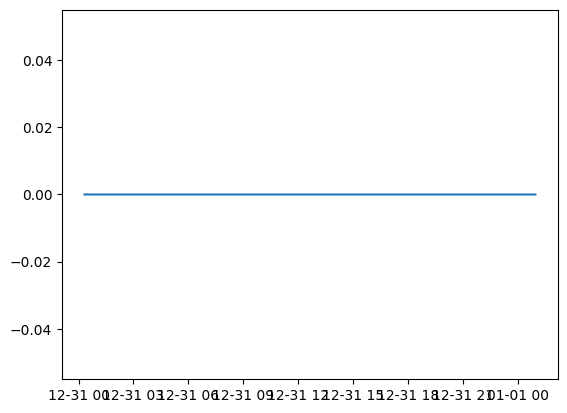

In [37]:
plt.plot(data["Total Volume"])

In [40]:
data["Volume"]

2022-12-31 00:19:37.434    0
2022-12-31 00:19:37.636    0
2022-12-31 00:19:37.739    0
2022-12-31 00:19:39.435    0
2022-12-31 00:22:27.787    0
                          ..
2023-01-01 00:58:01.250    0
2023-01-01 00:58:25.847    0
2023-01-01 00:58:32.455    0
2023-01-01 00:58:45.088    0
2023-01-01 00:58:47.588    0
Name: Volume, Length: 11095, dtype: int64